## Abstract

---



El presente proyecto tiene como objetivo analizar un conjunto de datos relacionado con enfermedades cardíacas, con el fin de identificar patrones y relaciones entre diferentes variables clínicas y que puedan influir en la presencia de enfermedad del corazón. El dataset utilizado contiene información de 918 pacientes e incluye 12 variables que abarcan características fisiológicas y factores clínicos o conductuales.

El propósito central del análisis es explorar la relación entre estas variables y el riesgo cardíaco. Se busca responder preguntas como: ¿existe una relación significativa entre la edad y la presencia de enfermedad cardíaca?, ¿cómo influye el tipo de dolor torácico?, y ¿qué patrones parecen tener mayor incidencia en los casos positivos?

En términos prácticos, este proyecto busca desarrollar una comprensión visual e intuitiva de los factores que inciden en la enfermedad cardíaca, constituyendo un primer paso hacia modelos predictivos más avanzados.

**Hipotesis 1:** El Dolor de Pecho Asintomatico y la Pendiente del Segmento ST son Predictores Fuertes de la Enfermedad Cardíaca

---

**Hipotesis 2:** La Frecuencia Cardiaca Máxima (MaxHR) tiene una Correlación Negativa más Fuerte con la Enfermedad Cardíaca que la Edad

---

**Hipotesis 3:** La Combinación de Sexo Masculino y Azúcar en Ayunas Elevada (FastingBS = 1) Aumenta Drásticamente la Probabilidad de Diagnostico Positivo
Variables clave a testear: Sex y FastingBS.

---

**Conclusion del Trabajo a Realizar**:

Este proyecto desarrollara un modelo de clasificación para predecir la presencia de enfermedad cardíaca utilizando variables clinicas y fisiologicas.
Se aplicaran tecnicas de seleccion de características para optimizar el dataset y se entrenara el modelo para proporcionar una comprension predictiva de los factores de riesgo de la enfermedad.

Estructura del Dataset:
Age: Edad del paciente (años).

*   Sex: Género del paciente (M: Masculino, F: Femenino).
*   FastingBS: Nivel de azúcar en sangre en ayunas (0: $\le$ 120 mg/dl, 1: $>$ 120 mg/dl).
*   RestingBP:	Presión arterial en reposo (mm Hg).
*   Cholesterol:	Colesterol sérico (mg/dl).
*   RestingECG:	Resultados del electrocardiograma en reposo (Normal, ST, LVH).
*   ChestPainType:	Tipo de dolor en el pecho (ASY: Asintomático, NAP: No Anginoso, ATA: Angina Atípica, TA: Angina Típica).
*   MaxHR:	Frecuencia cardíaca máxima alcanzada durante el ejercicio (latidos/min).
*   ExerciseAngina:	Dolor de pecho inducido por el ejercicio (Y: Sí, N: No).
*   Oldpeak:	Depresión del segmento ST inducida por el ejercicio con respecto al reposo.
*   ST_Slope:	Pendiente del segmento ST durante el ejercicio (Up: Ascendente, Flat: Plano, Down: Descendente)
*   **HeartDisease(Variable Objetivo):** Presencia de enfermedad cardíaca (1: Sí, 0: No).

Observaciones Iniciales:
*   El Dataset contiene un total de 918 registros.
*   La mayor concentración de pacientes se encuentra en el rango de 45 a 65 años.
*   Hay un predominio de pacientes masculinos en la muestra.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#url = 'https://docs.google.com/spreadsheets/d/1xbzvQnciMWQqJ8YLPGBa5lmorryrJW0UQQFhU5S_UpM/edit?usp=sharing'
#csv_url = url.replace('/edit?usp=sharing', '/export?format=csv')
#df = pd.read_csv(csv_url)

github_url = 'https://raw.githubusercontent.com/Buja2244/Proyecto-Data-Analisis-I/main/HeartDiseaseDB.xlsx'
df = pd.read_excel(github_url)
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Descripción de las Variables del Dataset

| Variable | Descripción Detallada | Unidades/Valores |
| :--- | :--- | :--- |
| **Age** | Edad del paciente | [Años] |
| **Sex** | Sexo del paciente | [M: Masculino, F: Femenino] |
| **Chest Pain Type** | Tipo de dolor de pecho | [TA: Angina típica, ATA: Angina atípica, NAP: Dolor no anginoso, ASY: Asintomático] |
| **Resting BP** | Presión arterial en reposo | [mm Hg] |
| **Cholesterol** | Colesterol sérico | [mm/dl] |
| **Fasting BS** | Glucemia en ayunas | [1: > 120 mg/dl, 0: en caso contrario] |
| **Resting ECG** | Resultados del electrocardiograma en reposo | [Normal: Normal, ST: Anomalía ST-T, LVH: Hipertrofia ventricular izquierda] |
| **Max HR** | Frecuencia cardíaca máxima alcanzada | [Valor numérico entre 60 y 202] |
| **Exercise Angina** | Angina inducida por el ejercicio | [S: Sí, N: No] |
| **Old peak** | Máximo antiguo = ST | [Valor numérico medido en depresión] |
| **ST\_Slope** | Pendiente del segmento ST del ejercicio máximo | [Ascendente, Plano, Descendente] |
| **Heart Disease** | Clase de salida | [1: Enfermedad cardíaca, 0: Normal] |

In [41]:
#Nulos
conteo_nulos = df.isnull().sum()

print("Conteo de Valores Nulos:")
print(conteo_nulos)

Conteo de Valores Nulos:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [4]:
#Al ejecutar df.isnull().sum(), indica que no hay valores nulos en ninguna de las columnas.

#En caso de tener un % bajo de nulos dropear la fila completa que lo contenga con:
#df.dropna(axis=0):

In [42]:
print("Medidas Descriptivas:")
print(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']].describe().T)

Medidas Descriptivas:
             count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0


**Interpretacion:**


*   Edad media: la edad promedio de los pacientes es de aproximadamente 53.5 años. El rango de edad va desde 28 hasta 77 años.
*   La Frecuencia cardiaca maxima promedio es de: 137 latidos por minuto.

*   Colesterol.: se observa que el valor minimo es 0, dado que no es compatible con la vida, puede ser que se haya usado como reemplazo para casos en los que no se pudo medir el colesterol.

In [43]:
colesterol_cero = (df['Cholesterol'] == 0).sum()
print(f"Total de filas con Colesterol 0: **{colesterol_cero}**")

Total de filas con Colesterol 0: **172**


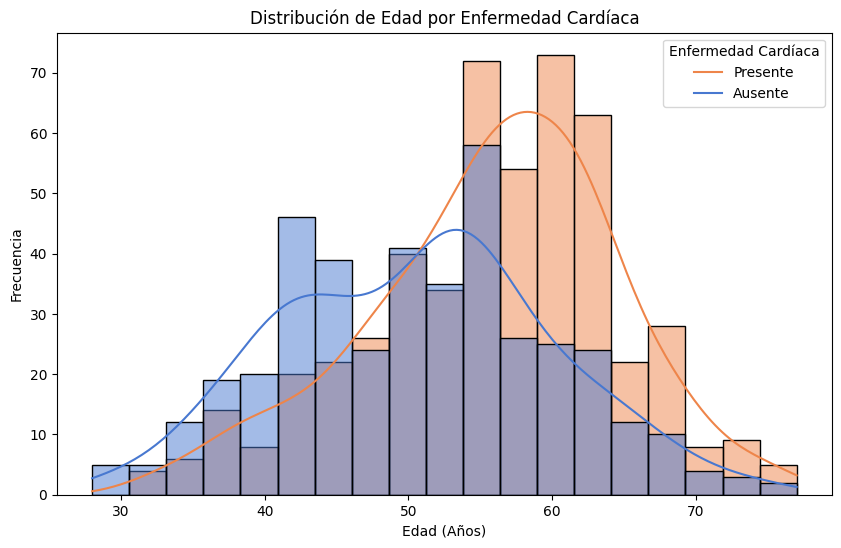

In [44]:
# Relacion entre edad y enfermedad cardíaca
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, palette='muted')
plt.title('Distribución de Edad por Enfermedad Cardíaca')
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')
plt.legend(title='Enfermedad Cardíaca', labels=['Presente', 'Ausente'])
plt.show()


**El pico de frecuencia para los pacientes con enfermedad cardíaca se encuentra en un rango de edad más avanzado que el de frecuencia para los pacientes sanos, indicando que el riesgo se acumula con la edad.**

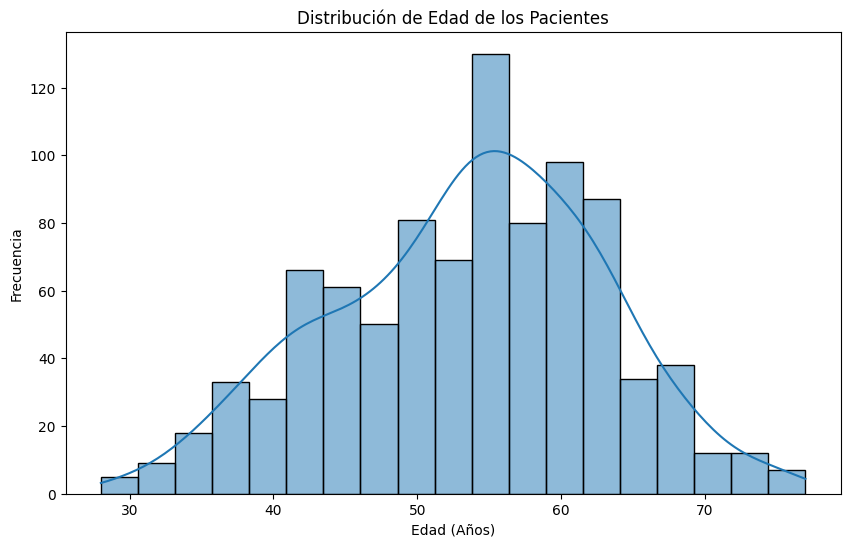

In [45]:
# Histograma de Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribución de Edad de los Pacientes')
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')
plt.show()

**Se observa que la mayor concentración de pacientes en el dataset se encuentra en el rango de 45 a 65 años.**

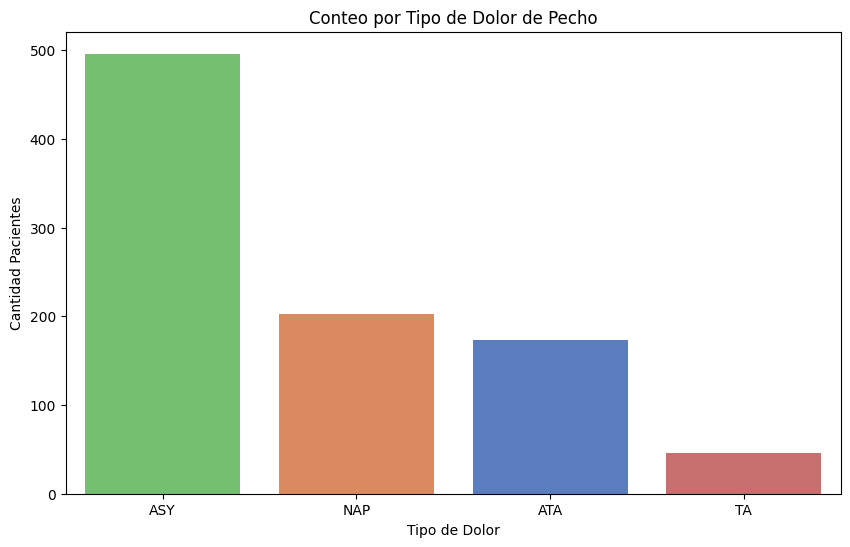

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='ChestPainType',
    palette='muted',
    hue='ChestPainType',
    order=df['ChestPainType'].value_counts().index
)
plt.title('Conteo por Tipo de Dolor de Pecho')
plt.xlabel('Tipo de Dolor')
plt.ylabel('Cantidad Pacientes')
plt.show()

**Se concluye que la categoría de dolor de pecho asintomatico (ASY) es, la más prevalente en el conjunto de datos.**

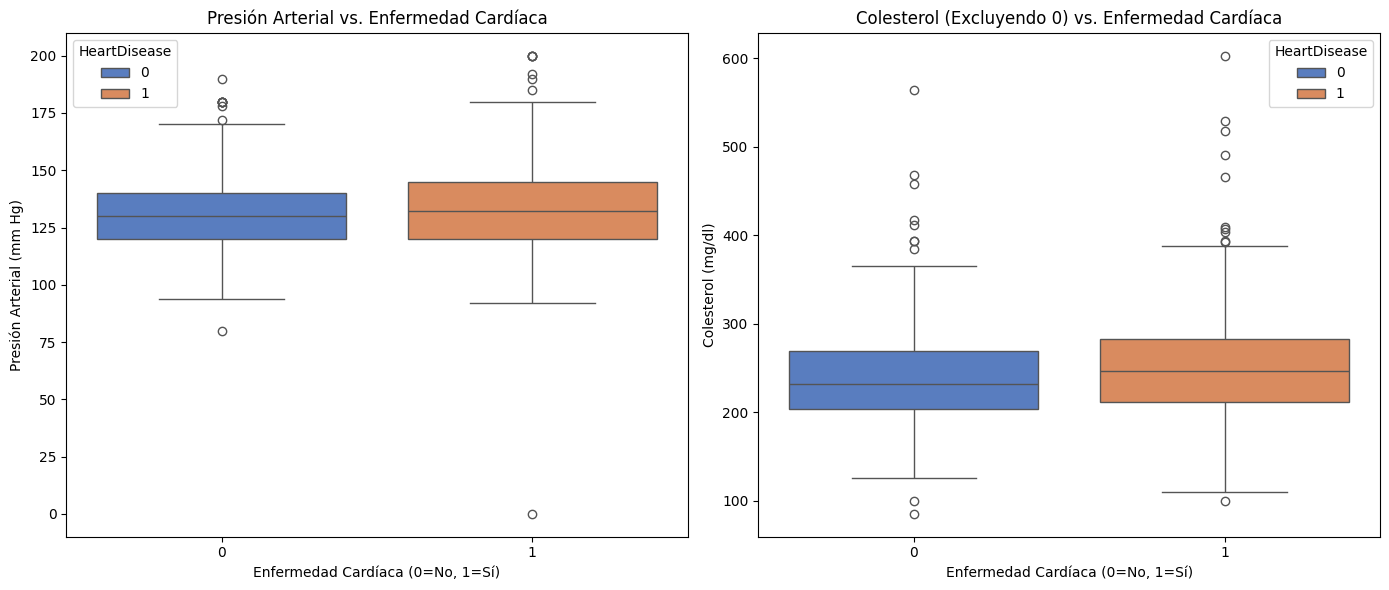

In [47]:
#Colesterol y Presion Arterial vs Enfermedad Cardiaca
#Filtrado valores de colesterol = 0
df_filtrado_colesterol = df[df['Cholesterol'] > 0].copy()

plt.figure(figsize=(14, 6))

#Presión Arterial
plt.subplot(1, 2, 1)
sns.boxplot(x='HeartDisease', y='RestingBP', data=df, palette='muted', hue='HeartDisease')
plt.title('Presión Arterial vs. Enfermedad Cardíaca')
plt.xlabel('Enfermedad Cardíaca (0=No, 1=Sí)')
plt.ylabel('Presión Arterial (mm Hg)')

#Colesterol
plt.subplot(1, 2, 2)
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df_filtrado_colesterol, palette='muted', hue='HeartDisease')
plt.title('Colesterol (Excluyendo 0) vs. Enfermedad Cardíaca')
plt.xlabel('Enfermedad Cardíaca (0=No, 1=Sí)')
plt.ylabel('Colesterol (mg/dl)')

plt.tight_layout()
plt.show()

**Se ve una relación donde los pacientes con enfermedad cardíaca muestran una mediana de colesterol ligeramente más alta.**

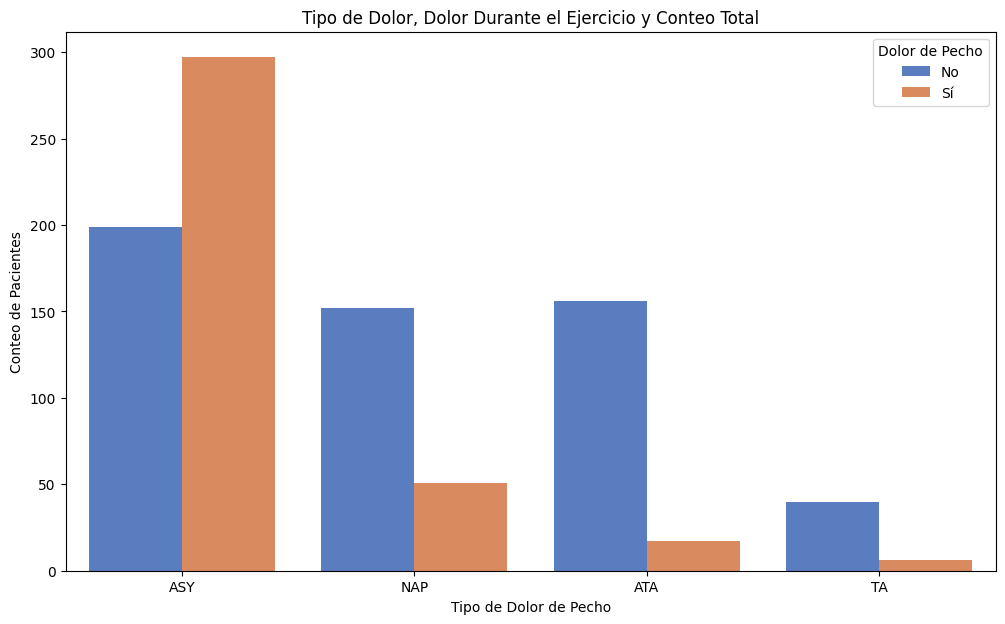

In [48]:
plt.figure(figsize=(12, 7))
sns.countplot(
    data=df,
    x='ChestPainType',
    hue='ExerciseAngina',
    palette='muted',
    order=df['ChestPainType'].value_counts().index
)

plt.title('Tipo de Dolor, Dolor Durante el Ejercicio y Conteo Total')
plt.xlabel('Tipo de Dolor de Pecho')
plt.ylabel('Conteo de Pacientes')
plt.legend(title='Dolor de Pecho', labels=['No', 'Sí'])
plt.show()

**La mayor concentración de pacientes se da en el tipo de dolor Asintomatico (ASY). Dentro de este grupo, la proporción de pacientes que reportan dolor de pecho durante el ejercicio es mucho mas alta en comparación con el resto.**

**Sobre valores Nulos:**

---


El dataset no presenta valores nulos o NaN en las columnas. Pero se identificaron valores 0 en la columna Colesterol. Clínicamente, un valor de Colesterol 0 mg/dl es imposible por lo que se excluyeron los datos que contenian ese valor en sus filas al realizar el grafico que realizaba una comparacion usando el Colesterol.


---



**Hipotesis 1:** El Dolor de Pecho Asintomatico y la Pendiente del Segmento ST son Predictores Fuertes de la Enfermedad Cardíaca.

Analizamos la distribucion de la enfermedad para la categoría de dolor Asintomatico (ASY) y para la pendiente Plana (Flat).


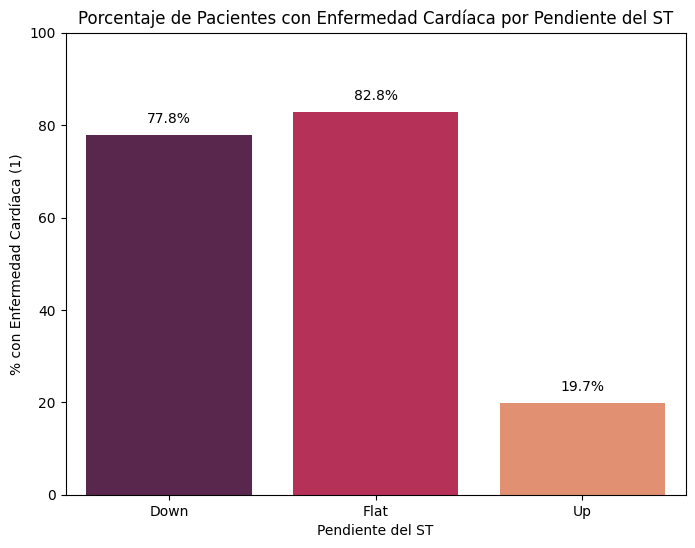

Porcentaje de pacientes con Pendiente Plana (Flat) que tienen enfermedad: 82.8%
----------------------------------------------------------------------------------
Porcentaje de pacientes con Dolor Asintomático (ASY) que tienen enfermedad: 79.0%


In [49]:
df_fs = df.copy()
# Enfermedad por ST_Slope
slope_pivot = df_fs.groupby('ST_Slope')['HeartDisease'].value_counts(normalize=True).mul(100).rename('Porcentaje').reset_index()
slope_disease = slope_pivot[slope_pivot['HeartDisease'] == 1]

# Pendiente del ST vs Enfermedad
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='ST_Slope', hue='ST_Slope', y='Porcentaje', data=slope_disease, palette='rocket')
plt.title('Porcentaje de Pacientes con Enfermedad Cardíaca por Pendiente del ST')
plt.xlabel('Pendiente del ST')
plt.ylabel('% con Enfermedad Cardíaca (1)')
plt.ylim(0, 100)

for container in ax.containers:
    for bar in container:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        percentage = y
        ax.text(x, y + 2, f"{percentage:.1f}%", color='black', ha="center", va="bottom")
plt.show()

# ChestPainType
cpt_pivot = df_fs.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True).mul(100).rename('Porcentaje').reset_index()
cpt_disease = cpt_pivot[cpt_pivot['HeartDisease'] == 1]

# ASY
asy_percentage = cpt_disease[cpt_disease['ChestPainType'] == 'ASY']['Porcentaje'].iloc[0]

print(f"Porcentaje de pacientes con Pendiente Plana (Flat) que tienen enfermedad: {slope_disease[slope_disease['ST_Slope'] == 'Flat']['Porcentaje'].iloc[0]:.1f}%")
print("----------------------------------------------------------------------------------")
print(f"Porcentaje de pacientes con Dolor Asintomático (ASY) que tienen enfermedad: {asy_percentage:.1f}%")

**ST_Slope:**
*   Un  82.8% de los pacientes con la pendiente Flat (Plana) tienen enfermedad
*   Solo el 19.7% de los pacientes con pendiente Up tienen la enfermedad.

**ChestPainType:**

*   El 79% de los pacientes que reportaron dolor Asintomático (ASY) tienen enfermedad cardiaca.

La Hipotesis 1 queda **VALIDADA**. Estos porcentajes demuestran que tanto la pendiente Flat como el dolor ASY son, de manera individual, predictores muy fuertes de la enfermedad.

**Hipotesis 2:** La Frecuencia Cardiaca Máxima (MaxHR) tiene una Correlación Negativa más Fuerte con la Enfermedad Cardiaca que la Edad

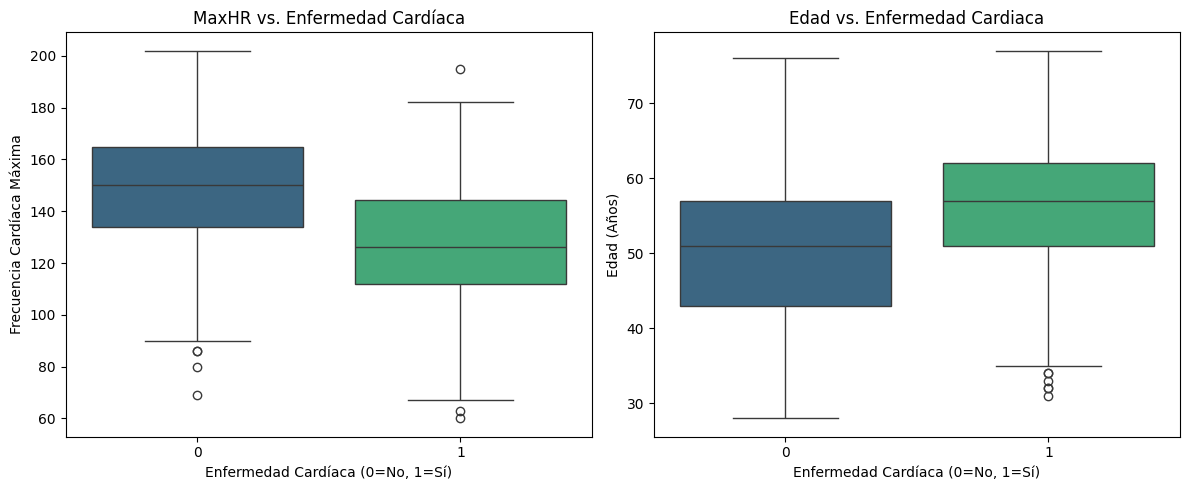

Correlacion de Age con HeartDisease: 0.2820
Correlacion de MaxHR con HeartDisease: -0.4004


In [50]:
# Correlacin
corr_age = df_fs['HeartDisease'].corr(df_fs['Age'])
corr_maxhr = df_fs['HeartDisease'].corr(df_fs['MaxHR'])

plt.figure(figsize=(12, 5))

# MaxHR
plt.subplot(1, 2, 1)
sns.boxplot(x='HeartDisease', y='MaxHR', data=df_fs, palette='viridis', hue='HeartDisease', legend=False)
plt.title('MaxHR vs. Enfermedad Cardíaca')
plt.xlabel('Enfermedad Cardíaca (0=No, 1=Sí)')
plt.ylabel('Frecuencia Cardíaca Máxima')

# Age
plt.subplot(1, 2, 2)
sns.boxplot(x='HeartDisease', y='Age', data=df_fs, palette='viridis', hue='HeartDisease', legend=False)
plt.title('Edad vs. Enfermedad Cardiaca')
plt.xlabel('Enfermedad Cardíaca (0=No, 1=Sí)')
plt.ylabel('Edad (Años)')

plt.tight_layout()
plt.show()

print(f"Correlacion de Age con HeartDisease: {corr_age:.4f}")
print(f"Correlacion de MaxHR con HeartDisease: {corr_maxhr:.4f}")

Para demostrar que una correlacion es mas fuerte miramos el valor absoluto del coeficiente:

*   0.4005 > 0.2829

Esto demuestra que la relacion entre MaxHR y la enfermedad es más fuerte que la relacion entre la Edad y la enfermedad.

Direccion (MaxHR): El signo negativo (-0.4004) significa que a medida que la Frecuencia Cardiaca Maxima aumenta la probabilidad de tener enfermedad cardiaca disminuye (una baja respuesta al ejercicio indica riesgo).

La Hipotesis 2 queda **VALIDADA**. porque la magnitud de la correlación de MaxHR es superior a la de la Edad, demostrando una relacion lineal mas intensa con el diagnóstico de enfermedad.


**Hipotesis 3:** La Combinación de Sexo Masculino y Azúcar en Ayunas Elevada (FastingBS = 1) Aumenta Drásticamente la Probabilidad de Diagnostico Positivo Variables clave a testear: Sex y FastingBS.

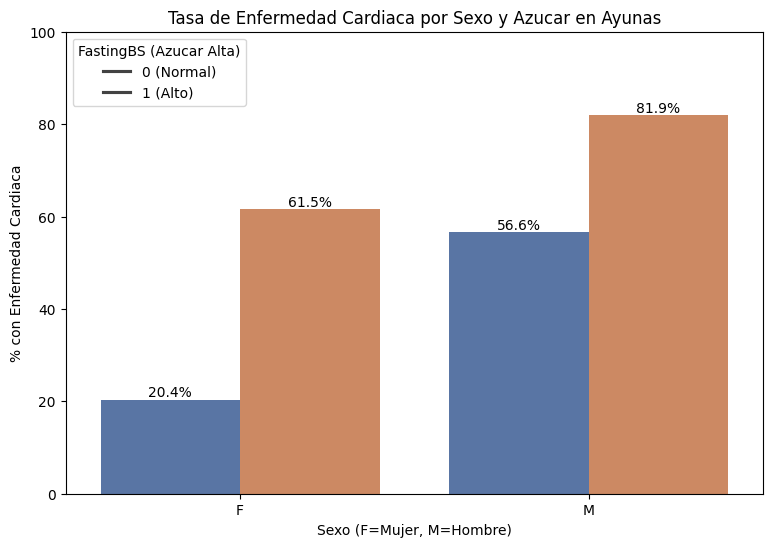

In [51]:
cross_tab_norm = pd.crosstab(
    [df_fs['Sex'], df_fs['FastingBS']],
    df_fs['HeartDisease'],
    normalize='index'
).mul(100)

disease_rate = cross_tab_norm[1].rename('Disease_Rate').reset_index()

plt.figure(figsize=(9, 6))
ax = sns.barplot(x='Sex', y='Disease_Rate', hue='FastingBS', data=disease_rate, palette='deep')
plt.title('Tasa de Enfermedad Cardiaca por Sexo y Azucar en Ayunas')
plt.xlabel('Sexo (F=Mujer, M=Hombre)')
plt.ylabel('% con Enfermedad Cardiaca')
plt.legend(title='FastingBS (Azucar Alta)', labels=['0 (Normal)', '1 (Alto)'])
plt.ylim(0, 100)

for container in ax.containers:
    plt.bar_label(container, fmt='%.1f%%')
plt.show()

h3_percentage = disease_rate[(disease_rate['Sex'] == 'M') & (disease_rate['FastingBS'] == 1)]['Disease_Rate'].iloc[0]

El grafico muestra claramente que el subgrupo de Hombres (M) con Azúcar Alta en Ayunas tiene la tasa de incidencia de enfermedad cardíaca más alta en todo el dataset 81.9%.

La Hipotesis 3 queda **VALIDADA**. porque el porcentaje para esta combinación de factores demuestra un aumento fuerte de la probabilidad de diagnostico positivo.

In [52]:
# Feature Selection
# Tratamiento de valores anomalos
df_fs = df.copy()
df_fs['RestingBP'] = df_fs['RestingBP'].replace(0, df_fs['RestingBP'].median())
chol_median = df_fs[df_fs['Cholesterol'] > 0]['Cholesterol'].median()
df_fs['Cholesterol'] = df_fs['Cholesterol'].replace(0, chol_median)

# Separar la variable objetivo
y = df_fs['HeartDisease']
X = df_fs.drop('HeartDisease', axis=1)
X_encoded = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

In [53]:
# Columnas numericas originales
col_num_original = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']

# Columnas categoricas codificadas
col_cat = [col for col in X_encoded.columns if col not in col_num_original]
numerical_cols = col_num_original

# SelectKBest
selector_chi2 = SelectKBest(chi2, k='all')
selector_chi2.fit(X_encoded[col_cat], y)
scores_chi2 = pd.DataFrame({'Feature': col_cat, 'Score_Chi2': selector_chi2.scores_, 'P_Value': selector_chi2.pvalues_})

# F-Test
selector_f = SelectKBest(f_classif, k='all')
selector_f.fit(X_encoded[numerical_cols], y)
scores_f = pd.DataFrame({'Feature': numerical_cols, 'Score_F': selector_f.scores_, 'P_Value': selector_f.pvalues_})

# Ordenar por P-Values
all_scores = pd.concat([scores_chi2[['Feature', 'P_Value']], scores_f[['Feature', 'P_Value']]])
all_scores['P_Value'] = all_scores['P_Value'].round(4)
all_scores = all_scores.sort_values(by='P_Value', ascending=True).reset_index(drop=True)

print("Resultados de P-Value:")
print(all_scores)

# Caracteristicas finales (P-Values mas bajos)
selected_features = all_scores.head(10)['Feature'].tolist()

X_final = X_encoded[selected_features]
print("--------------------------------------")
print("Características Seleccionadas Finales:")
print(f"Filas: {X_final.shape[0]}, Columnas: {X_final.shape[1]}")
print("--------------------------------------")
print(X_final.head())

Resultados de P-Value:
              Feature  P_Value
0               Sex_M   0.0000
1   ChestPainType_ATA   0.0000
2   ChestPainType_NAP   0.0000
3       ST_Slope_Flat   0.0000
4    ExerciseAngina_Y   0.0000
5             Oldpeak   0.0000
6                 Age   0.0000
7         ST_Slope_Up   0.0000
8           FastingBS   0.0000
9               MaxHR   0.0000
10          RestingBP   0.0003
11      RestingECG_ST   0.0053
12        Cholesterol   0.0211
13  RestingECG_Normal   0.0798
14   ChestPainType_TA   0.1057
--------------------------------------
Características Seleccionadas Finales:
Filas: 918, Columnas: 10
--------------------------------------
   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ST_Slope_Flat  \
0   True               True              False          False   
1  False              False               True           True   
2   True               True              False          False   
3  False              False              False           True   
4   True      

Todos los P-Values reportados como 0.0000 son valores extremadamente pequeños,lo que significa que la probabilidad de que la relacion se deba al azar es practicamente nula.

**Caracteristicas Seleccionadas Finales:**

Las 10 variables con el P-Value mas bajo son:

*   ST_Slope_Up
*   ST_Slope_Flat
*   Oldpeak
*   ChestPainType_ATA
*   MaxHR
*   ExerciseAngina_Y
*   FastingBS
*   Age
*   Sex_M
*   ChestPainType_NAP


---
**Random Forest**

---


In [54]:
# Division de Conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X_final, # X_final = dataframe con las 10 features seleccionadas
    y, # y = variable objetivo
    test_size=0.3,
    random_state=42,
    stratify=y
)
print(f"Tamaño del conjunto de Entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de Prueba: {X_test.shape}")

# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

Tamaño del conjunto de Entrenamiento: (642, 10)
Tamaño del conjunto de Prueba: (276, 10)


-----------------------------
Precision del Modelo: 0.8514
-----------------------------


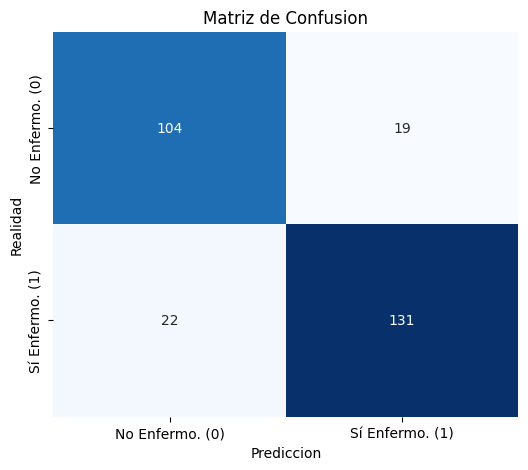

Reporte:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.87      0.86      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [55]:
# Precision
accuracy = accuracy_score(y_test, y_pred)
print("-----------------------------")
print(f"Precision del Modelo: {accuracy:.4f}")
print("-----------------------------")

# Matriz de Confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Enfermo. (0)', 'Sí Enfermo. (1)'],
            yticklabels=['No Enfermo. (0)', 'Sí Enfermo. (1)'])
plt.title('Matriz de Confusion')
plt.xlabel('Prediccion')
plt.ylabel('Realidad')
plt.show()

# Clasificacin
print("Reporte:")
print(classification_report(y_test, y_pred))

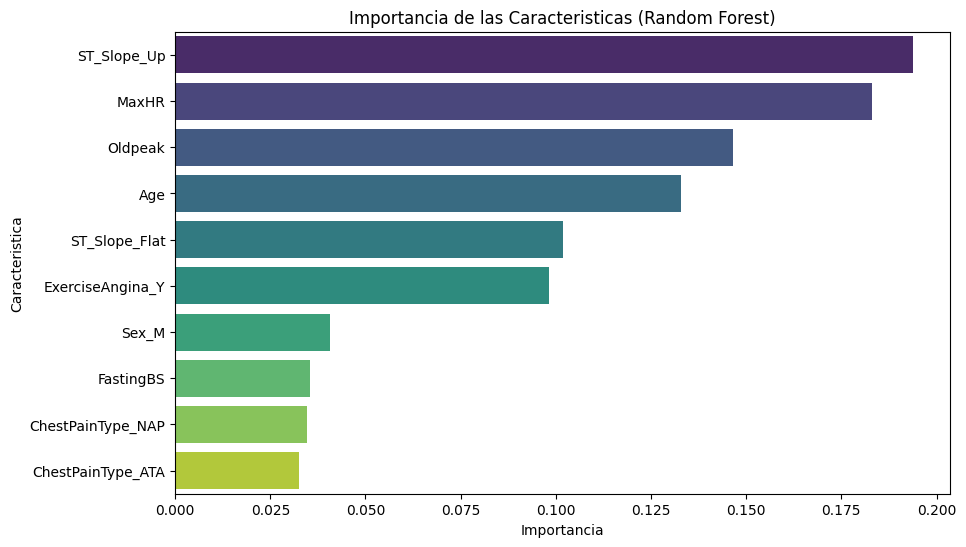

Importancia de las Caracteristicas:
ST_Slope_Up          0.193889
MaxHR                0.183173
Oldpeak              0.146554
Age                  0.132921
ST_Slope_Flat        0.101950
ExerciseAngina_Y     0.098140
Sex_M                0.040560
FastingBS            0.035531
ChestPainType_NAP    0.034729
ChestPainType_ATA    0.032553
dtype: float64


In [56]:
feature_importances = pd.Series(model_rf.feature_importances_, index=X_final.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, hue=feature_importances.index, palette='viridis', legend=False)
plt.title('Importancia de las Caracteristicas (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Caracteristica')
plt.show()

print("Importancia de las Caracteristicas:")
print(feature_importances)

**Resultados del modelo Random Forest:** **85.14% de precisión**
---
El modelo demostro que la informacion clave para el diagnostico de la enfermedad cardiaca en este dataset proviene de la prueba de esfuerzo (principalmente el segmento ST y la frecuencia cardiaca máxima).

El modelo Random Forest entrenado con las 10 caracteristicas principales demostro alta efectividad para predecir la enfermedad cardiaca en este dataset.El modelo alcanzo una precision del 85.14% en el conjunto de prueba.




---

**Regresion Logistica**


---



ANALISIS DE COEFICIENTES
Positivo = Aumento de Riesgo - Negativo = Disminucion de Riesgo
|                   | 0          |
|:------------------|:-----------|
| FastingBS         | 1.21165    |
| Sex_M             | 1.11816    |
| ExerciseAngina_Y  | 0.941482   |
| ST_Slope_Flat     | 0.648087   |
| Oldpeak           | 0.188026   |
| Age               | 0.00630749 |
| MaxHR             | -0.0137552 |
| ChestPainType_ATA | -1.36133   |
| ChestPainType_NAP | -1.43203   |
| ST_Slope_Up       | -1.44811   |


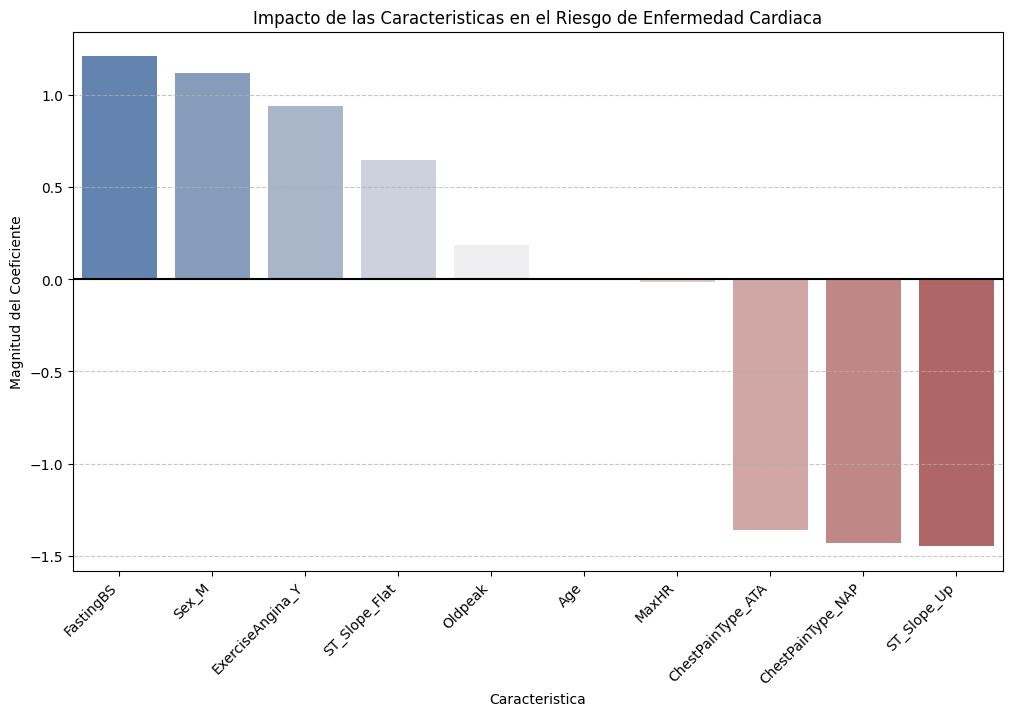

-----------------------------------------------------------------
Porcentaje de Precision: 88.41%


In [57]:
#RL
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

coeficientes = pd.Series(model_lr.coef_[0], index=X_train.columns)
coeficientes_sorted = coeficientes.sort_values(ascending=False)

print("ANALISIS DE COEFICIENTES")
print("Positivo = Aumento de Riesgo - Negativo = Disminucion de Riesgo")
print(coeficientes_sorted.to_markdown(numalign="left", stralign="left"))

# Coeficientes
plt.figure(figsize=(12, 7))
sns.barplot(x=coeficientes_sorted.index, y=coeficientes_sorted.values, palette='vlag', hue=coeficientes_sorted.index, legend=False)
plt.title('Impacto de las Caracteristicas en el Riesgo de Enfermedad Cardiaca')
plt.ylabel('Magnitud del Coeficiente')
plt.xlabel('Caracteristica')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linestyle='-')
plt.show()
print("-----------------------------------------------------------------")
print(f"Porcentaje de Precision: {accuracy_lr * 100:.2f}%")

# **Resultados del Modelo de Regresion Logística: 88.41% de precision**

Este modelo simple y lineal, indica que la relación entre las 10 caracteristicas clave y la enfermedad es predominantemente lineal.

**Conclusiones Finales - Mejor Modelo: Regresion Logistica**

**Mayor Precision:** La Regresion Logística alcanzo una precision de 88.41% vs 85.14% de Random Forest.

**Eficiencia:** Al ser un modelo lineal, es mas rapido y consume menos recursos de entrenamiento que Random Forest.


---



**Recomendacion Final**

La Regresion Logistica seria la mejor opcion porque proporciona el mejor rendimiento predictivo.
